![logo](images/untumbes.PNG)

<center><b>Prof. Dr. Jorge Zavaleta - zavaleta.jorge@gmail.com</b></center>

# Análisis de Agrupamientos (clustering)

Los ejemplos en Python presentados, forman parte de los Capítulos 7 y 8 del libro:
<b>Tan, Pang-Ning; Steinbach, Micahel; Karpatne, Anuj; Kumar, Vipin. "Introducción a la minería de datos". 2ed, Pearson 2019. ISBN 9780133128901</b> para comprender algunos de los conceptos estudiados.

El análisis de agrupamientos busca dividir los datos de entrada en grupos de instancias estrechamente relacionadas de modo que las instancias que pertenecen al mismo grupo sean más similares entre sí que las instancias que pertenecen a otros grupos. 

In [2]:
# libray
import pandas as pd
import numpy as np
from sklearn import cluster
import matplotlib.pyplot as plt
%matplotlib inline
#
import warnings
warnings.filterwarnings("ignore")

>## Agrupamientos K-mans

El algoritmo de agrupamiento de k-means representa cada grupo por su centroide de grupo correspondiente. El algoritmo dividirirá los datos de entrada en *k* grupos separados aplicando iterativamente los dos pasos siguientes:
1. Forme *k* grupos asignando cada instancia a su centroide más cercano.
2. Vuelva a calcular el centroide de cada grupo.

>## Clasificación de peliculas - Ejemplo 1

In [16]:
# calsificacion de peliculas
ratings = [['Juan',5,5,2,1,1],['Maria',4,5,3,2,2],['Roberto',4,4,4,3,4],['Elisa',2,2,4,5,1],['Rober',1,2,3,4,5],['Harry',2,1,5,5,2],
          ['Jorge',3,5,4,1,5]]
titles = ['usuario','Tiburon','Star Wars','Exorcista','Omen','Oeste']
peliculas = pd.DataFrame(ratings,columns=titles)
peliculas

,usuario,Tiburon,Star Wars,Exorcista,Omen,Oeste
0,Juan,5,5,2,1,1
1,Maria,4,5,3,2,2
2,Roberto,4,4,4,3,4
3,Elisa,2,2,4,5,1
4,Rober,1,2,3,4,5
5,Harry,2,1,5,5,2
6,Jorge,3,5,4,1,5


**Análisis**:
A los primeros 3 usuarios (Juan, Maria y Roberto) les gusta las películas de acción (Tiburón y Star Wars), mientras que a los 3 últimos usuarios (Rober, Harry y Jorge) les gusta las películas de terror (Exorcista y Omen). 

O objetivo del ejercicio es aplicar la agrupación de k-means a los usuários para identificar grupos (cluster) de usuarios con preferencias de películas similares.

>## Clasificación de peliculas - Ejemplo 2

Ejemplo de cómo aplicar la agrupación de k-means (con k=2) en los datos de clasificación de películas. Primero debemos eliminar la columna "usuario" antes de aplicar el algoritmo de agrupación. La asignación de clúster para cada usuario se muestra como un dataframe de datos.

In [17]:
# cluster
data = peliculas.drop('usuario',axis=1)
k_means = cluster.KMeans(n_clusters=2, max_iter=50, random_state=1)
k_means.fit(data) 
labels = k_means.labels_
Ex2 = pd.DataFrame(labels, index=peliculas.usuario, columns=['Cluster ID'])
Ex2

,Cluster ID
usuario,
Juan,0
Maria,0
Roberto,0
Elisa,1
Rober,1
Harry,1
Jorge,0


The k-means clustering algorithm assigns the first three users to one cluster and the last three users to the second cluster. The results are consistent with our expectation. We can also display the centroid for each of the two clusters.

>## Centroides

El algoritmo de agrupamiento k-means asigna los primeros tres usuarios a un grupo y los últimos tres usuarios al segundo grupo. Los resultados son consistentes con nuestras expectativas. También podemos mostrar el centroide de cada uno de los dos grupos.

In [18]:
centroides = k_means.cluster_centers_
data_cent = pd.DataFrame(centroides,columns=data.columns)
data_cent

,Tiburon,Star Wars,Exorcista,Omen,Oeste
0,4.000000,4.750000,3.25,1.750000,3.000000
1,1.666667,1.666667,4.00,4.666667,2.666667


**Análisis**: El grupo 0 tiene calificaciones más altas para las películas de acción, mientras que el grupo 1 tiene calificaciones más altas para las películas de terror. Los centroides del clúster se pueden aplicar a otros usuarios para determinar sus asignaciones de cluster.

>## Determinar número de clusters

In [19]:
#numero de clusters
testData = np.array([[4,5,1,2,1],[3,2,4,4,2],[2,3,4,1,5],[3,2,3,3,3],[5,4,1,4,1],[2,3,5,3,1]])
labels = k_means.predict(testData)
labels = labels.reshape(-1,1)
usernames = np.array(['paul','kim','liz','tom','bill','bob']).reshape(-1,1)
cols = peliculas.columns.tolist()
cols.append('Cluster ID')
newusers = pd.DataFrame(np.concatenate((usernames, testData, labels), axis=1),columns=cols)
newusers

,usuario,Tiburon,Star Wars,Exorcista,Omen,Oeste,Cluster ID
0,paul,4,5,1,2,1,0
1,kim,3,2,4,4,2,1
2,liz,2,3,4,1,5,0
3,tom,3,2,3,3,3,1
4,bill,5,4,1,4,1,0
5,bob,2,3,5,3,1,1


>## Determinar el número de cluster en los datos

Para determinar la cantidad de grupos en los datos, podemos aplicar k-means con un número variable de grupos de 1 a 7 y calcular sus correspondientes errores de suma de cuadrados (SSE) como se muestra en el siguiente ejemplo. 

El **"codo"** en el gráfico de SSE frente al número de conglomerados se puede utilizar para estimar el número de conglomerados.

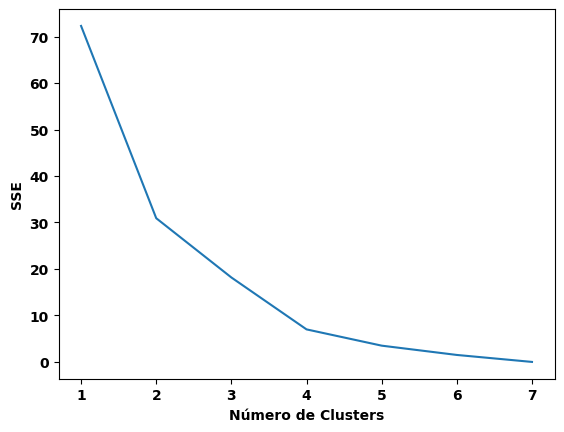

In [20]:
# determinar el numero de cluster k=? (graficamente)
numClusters = [1,2,3,4,5,6,7]
SSE = []
for k in numClusters:
    k_means = cluster.KMeans(n_clusters=k)
    k_means.fit(data)
    SSE.append(k_means.inertia_)

plt.plot(numClusters, SSE)
plt.xlabel('Número de Clusters')
plt.ylabel('SSE');

---
<center><b>© Jorge Zavaleta, 2024</b></center>